In [38]:
import json
import re
from collections import defaultdict

import matplotlib.pyplot as plt

In [39]:
with open('bench.json') as f:
    data = json.load(f)

matcher = re.compile(r'^sgemm_(?P<name>\w+)/(?P<m>\d+)/(?P<n>\d+)/(?P<k>\d+)$')

In [40]:
plots = defaultdict(lambda: defaultdict(list))
for point in data['benchmarks']:
    if m := matcher.match(point['name']):
        groups = m.groupdict()
        series = groups.get('name')
        plots[series]['ratio'].append(float(groups['m']) / float(groups['n']))
        plots[series]['flops'].append(float(point['flops']))

for series, points in plots.items():
    points['ratio'], points['flops'] = zip(
        *sorted(zip(points['ratio'], points['flops'])))

del plots['alex']

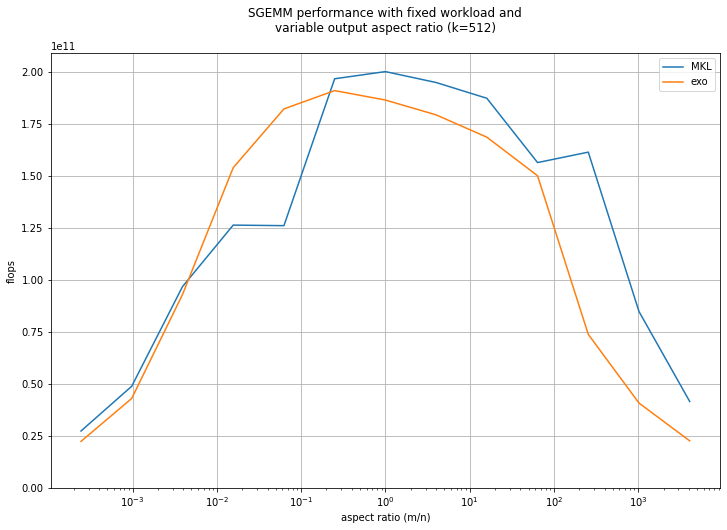

In [45]:
fig, ax = plt.subplots(figsize=(12,8))

for series, points in plots.items():
    ax.plot(points['ratio'], points['flops'], label=series)

ax.set(xlabel='aspect ratio (m/n)', ylabel='flops',
       title='SGEMM performance with fixed workload and\nvariable output aspect ratio (k=512)\n')
ax.set_xscale('log')
ax.set_ybound(lower=0, upper=None)
ax.grid()
ax.legend()

plt.show()